# TP 2 Morphomathématiques-Convolution-Détection de caractéristiques-

In [1]:
import skimage
import skimage.io as io
import skimage.filters as filters
import skimage.morphology as morph
import skimage.exposure as exposure
import skimage.measure as measure


import numpy as np
import skimage.color as color
import matplotlib.pyplot as plt
from scipy import ndimage

# Morphomathématiques 

# Exercice 1

1. Chargez et affichez l'image cell.png.

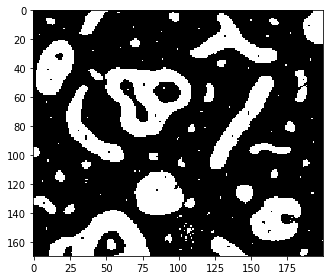

In [2]:
cell=io.imread("../images-TP1/cell.png")
io.imshow(cell)

2. Nettoyez l'image en enlevant les petits grains blancs et les points noirs situés sur les cellules (formes en blanc).

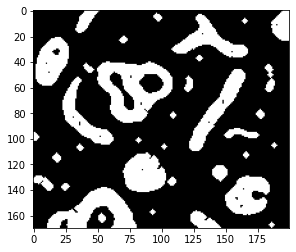

In [3]:
cell_erode=morph.binary_opening(cell, morph.disk(2))
plt.imshow(cell_erode, cmap="gray")


On remarque qu'en faisant une ouverture (erosion puis dilatation) avec un élement structurant en disque de rayon 2, les points blancs ont été retirés, cependant les points noirs sont toujours présent.

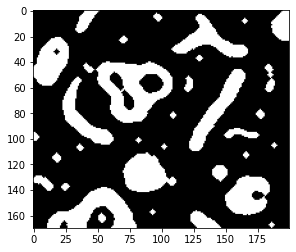

In [4]:
cell_erode_v2=morph.binary_closing(cell_erode, morph.disk(2))
plt.imshow(cell_erode_v2, cmap="gray")


On remarque qu'après l'ouverture (erosion puis dilation), si on effectue une fermeture (dilatation puis erosion) avec un élément structurant à 2, les granulés noir à l'intérieur des cellules ont disparues.

# Exercice 2

L’objectif de cet exercice est de trouver puis de compter le nombre de piscines visibles dans l’image satellitaire moliets.png. Dans un premier temps, ne cherchez pas à trouver parfaitement toutes les piscines : implémentez une première méthode qui donne un résultat approximatif de manière automatique. La plupart des fonctions utiles sont à importer depuis le module skimage.morphology

1. Appliquez un seuillage sur l’image pour mettre en évidence les piscines. Posez-vous la question de l’image à utiliser : vaut-il mieux travailler avec l’image initiale, l’image en niveau de gris, une bande particulière ?

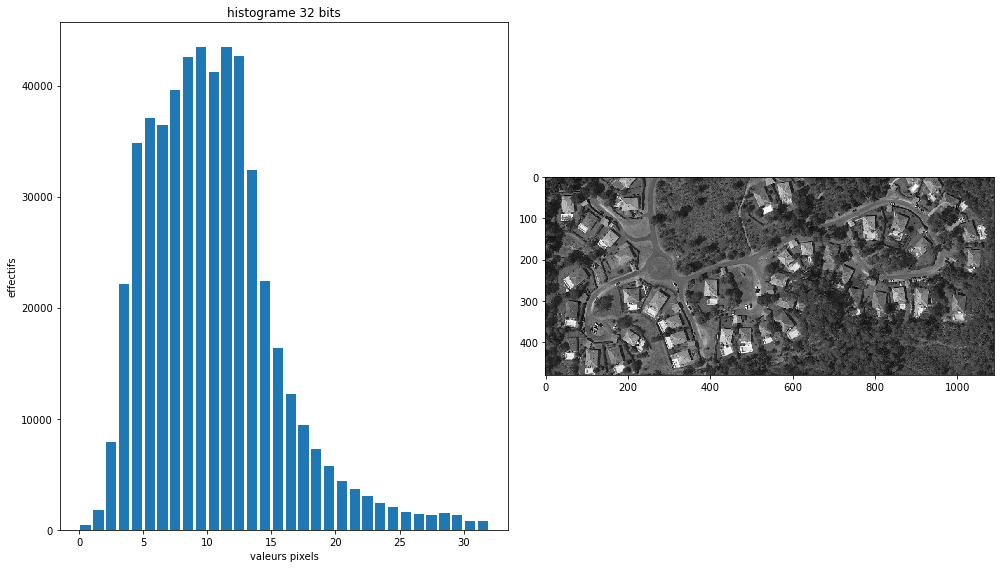

In [5]:
image=io.imread("../images-TP1/moliets.png")
image_gray=color.rgb2gray(image)

effectif, couleur=exposure.histogram(image_gray,32)
fig, ax=plt.subplots(1,2,figsize=(14,8))
ax[0].bar(couleur*32,effectif)
ax[0].set_title("histograme 32 bits")
ax[0].set_ylabel("effectifs")
ax[0].set_xlabel("valeurs pixels")
io.imshow(image_gray,cmap="gray")

On peut voir sur l'image en gris que les piscines sont les éléments les plus "blancs", ainsi en regardant l'histogramme on peut commencer par choisir un seuil à 25.


In [6]:
seuil=27
image_binarise=image_gray
for i in range(image_gray.shape[0]):
    for k in range(image_gray.shape[1]):
        if image_gray[i][k]*32<25:
            image_binarise[i][k]=0
        else:
            image_binarise[i][k]=1

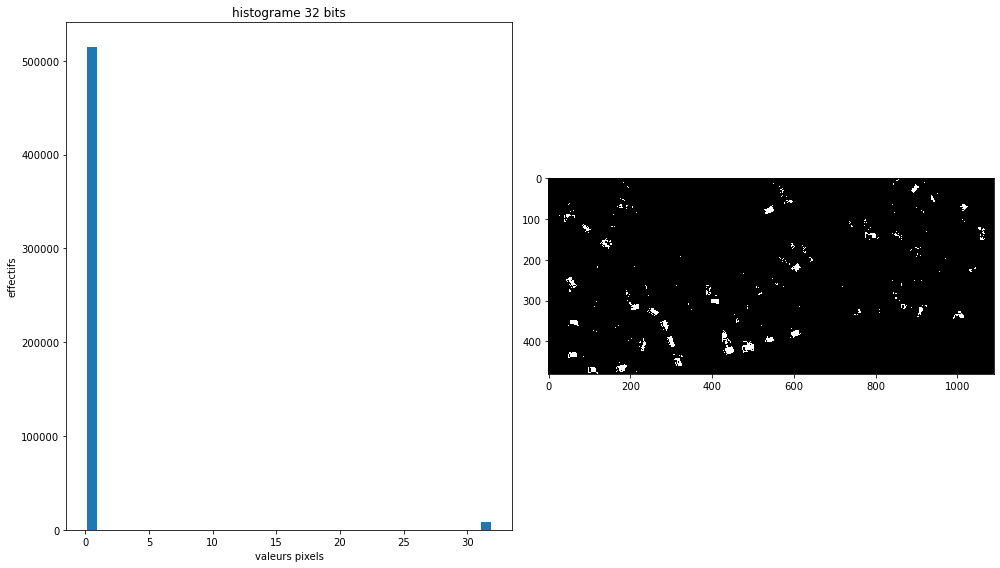

In [7]:
effectif, couleur=exposure.histogram(image_binarise,32)
fig, ax=plt.subplots(1,2,figsize=(14,8))
ax[0].bar(couleur*32,effectif)
ax[0].set_title("histograme 32 bits")
ax[0].set_ylabel("effectifs")
ax[0].set_xlabel("valeurs pixels")
io.imshow(image_binarise,cmap="gray")

2. Appliquez les opérateurs morphologiques vus en cours (érosion, dilatation, ouverture, fermeture) pour observer leur influence et en déduire l’opérateur le plus adapté au problème.


Text(0.5, 1.0, 'dilatation')

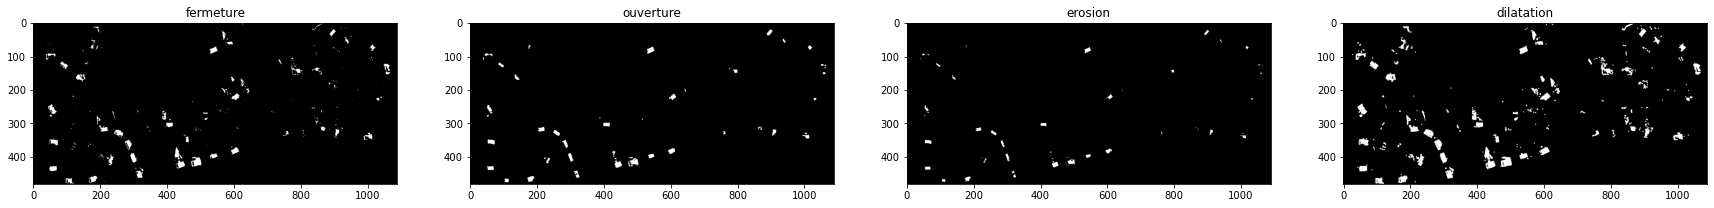

In [8]:
fig, ax= plt.subplots(1,4, figsize=(30,12))
ax[0].imshow(morph.binary_closing(image_binarise,morph.square(3)),cmap="gray")
ax[0].set_title("fermeture")
ax[1].imshow(morph.binary_opening(image_binarise,morph.square(3)),cmap="gray")
ax[1].set_title("ouverture")
ax[2].imshow(morph.binary_erosion(image_binarise,morph.square(3)),cmap="gray")
ax[2].set_title("erosion")
ax[3].imshow(morph.binary_dilation(image_binarise,morph.square(3)),cmap="gray")
ax[3].set_title("dilatation")

On remarque que la fermeture conserve des piscines mais il reste du bruit, pour l'ouverture, on perd des éléments.
Nous pouvons essayer d'appliquer une legère erosion à la fermeture.

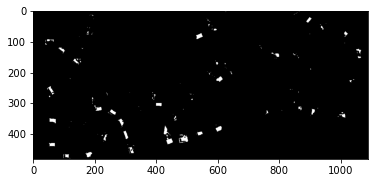

In [9]:
image_closing=morph.binary_closing(image_binarise,morph.square(2))
image_closing_erosion= morph.binary_erosion(image_closing,morph.square(2))
plt.imshow(image_closing_erosion, cmap="gray")

On remarque que l'image est un peu plus propre cependant il manque certaine piscines, cela est surment du au fait que certaines sont partiellement sous des arbres et l'ombre de ces derniers rend la detection des piscines plus compliqués. Un meilleur choix du seuil aurait pu être plus optimal mais on aurait surment eu plus de bruits ou des éléments indésirables qu'il aurait ensuite fallut retirer de l'image par érosion. 

3. Que permet de faire la fonction skimage.measure.regionprops ? En quoi peut-elle être utile pour compter le nombre de piscines ? Déterminer automatiquement le nombre de piscines


In [10]:
nombre_piscine = measure.regionprops(image_closing_erosion.astype(int))
print(len(nombre_piscine))

for r in nombre_piscine:
    print(r.area)

1
5853


# Convolution

# Exercice 1 

1 : Affichez la convolution entre l'image smiley.png avec un noyau gaussien en utilisant skimage.filters.gaussian

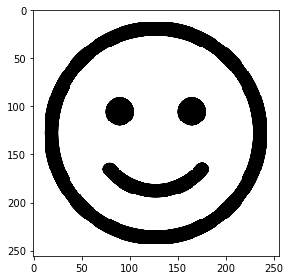

In [11]:
smiley=io.imread("./smiley.png")

io.imshow(smiley)

In [12]:
conv = skimage.filters.gaussian(smiley)

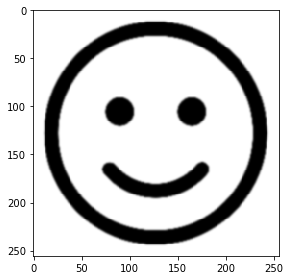

In [13]:
io.imshow(conv)

On remarque que le smiley convolué avec un kernel gaussien donne le smiley mais flouté.
Cela est surment dù au fait que la convolution va avoir pour effet de reduire les dimensions de la matrice, et donc la résolution de l'image.

2 : Soit un noyau défini par $h =[1, -1]$. Compléter le code ci-dessous  en utilisant scipy.ndimage.convolve afin d'afficher la convolution de l'image smiley avec  le noyau $h$

In [14]:
h=np.array([[1, -1]])
conv2 = ndimage.convolve(smiley,h)

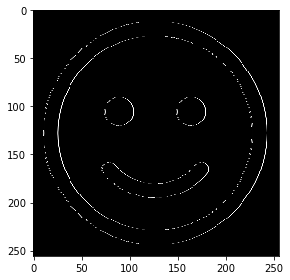

In [15]:
io.imshow(conv2)

On remarque que convolué le kernel h permet d'afficher les contours de l'image.

3 : Puis avec un noyau défini par un vecteur de taille 30 dont les éléments valent 1/30 (généré  avec numpy.ones)

In [16]:
kernel = np.ones(30)
for v in range(len(kernel)):
    kernel[v]=1/30

print(kernel.shape)

(30,)


On remarque que notre vecteur a un problème de dimension

In [17]:
kernel=kernel.reshape(kernel.shape[0],1)
print(kernel.shape)

(30, 1)


In [18]:
conv3 = ndimage.convolve(smiley,kernel)

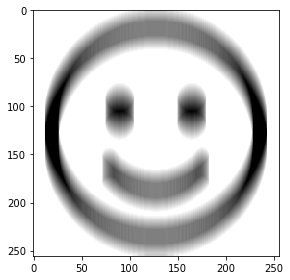

In [19]:
io.imshow(conv3)

On remarque que la convolution de notre image avec un noyau comportant des valeurs décimals va flouter notre image mais pas de manière homogène.

# Exercice 2 : Méthodes de Sobel et de Canny

In [20]:
L = io.imread("./L.png")


1. Utilisez skimage.filters.sobel pour afficher les gradients de l’image "L.png" calculés avec la méthode
de Sobel.


In [21]:
g=filters.sobel(L)

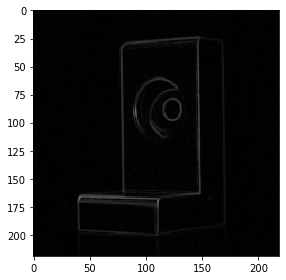

In [22]:
io.imshow(g)

2 . Appliquez un seuil sur l’image obtenue pour effectuer une première détection de contours.
Comment évolue cette détection lorsque le seuil varie ?

<BarContainer object of 256 artists>

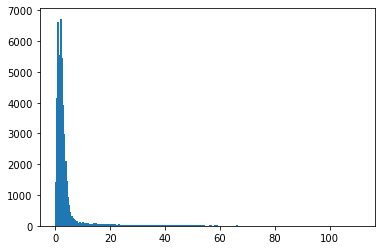

In [23]:
effectif, couleur=exposure.histogram(g)
plt.bar(couleur*256,effectif)

On voit sur l'image que nos contour apparaissement de manière claire tandis que le reste de 'image est noir. Ainsi d'après l'histogramme on peut choisir un seuil à 15.

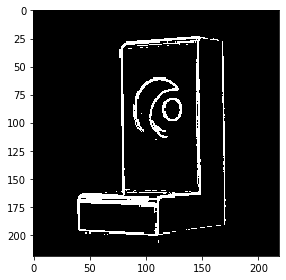

In [24]:
for i in range(g.shape[0]):
    for k in range(g.shape[1]):
        if g[i][k]*256 >=15:
            g[i][k]=1
        else:
            g[i][k]=0
io.imshow(g)

On remarque lorsque l'on applique un seuil après une première detection des contours, ces derniers sont très accentué.

3. Estimez le seuil optimal, c’est-à-dire celui qui permettra d’obtenir le plus de contours de l’objet
tout en conservant des contours les plus précis possibles.

voir histogramme au dessus

Le seuil optimal semble être entre 10 et 15.

4. Utilisez skimage.feature.canny pour afficher les contours détectés par la méthode de Canny. Observez l’influence du filtre gaussien.


In [25]:
g2=skimage.feature.canny(L)

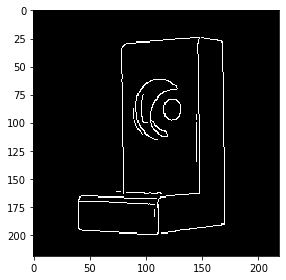

In [26]:
io.imshow(g2)

On remarque que le filtre de canny va en plus de trouver les contours de l'objet sur l'image, appliqué un seuil et binariser cette dernière en choisissant une valeur du seuil optimal pour avoir des contours visbles et propre

Le filtre de canny cherche les contours optimaux et non simplement les gradients comme dans le cas du filtre de Sobel.
Le filtre de canny essaie de garantir la continuité du contour. Pour sigma =2 le résultat semble satisfaisant même s il demeure quelques artéfacts.
Pour sigma=3 nous perdons le contous de l arrière plan.

#  Exercice Complémentaire : Méthode de Harris




1. Appliquez la méthode de Harris sur l’image L.png pour détecter les coins. Utilisez pour cela les
méthodes skimage.feature.corner_harris.


2. Critiquez le résultat obtenu : les coins ont-ils bien tous été détectés ? Y a-t-il des fausses alarmes
(c’est-à-dire des détections qui ne correspondent pas à des points) ? Comment expliquer ces
erreurs ?

Certains constrastes ne correspondent pas à des véritables coins pais à de surbrillances liées à léclairement.
Certain coins ne sont ne sont pas détectés car le gradient entre le fond et l objet n est pas suffisamment marqué.

#  Exercice Complémentaire : Transformée de Hough



1. La transformée de Hough ne s’applique pas directement sur l’image originale L.png : quelle image
utilisez-vous ? Représentez la transformée de Hough de l’image avec skimage.transform.hough_line.



2. La fonction skimage.transform.hough_line_peaks permet d’extraire de la transformée de
Hough les paramètres des lignes les plus importantes. Utilisez cette fonction pour affichez les 
lignes les plus importantes de l’image